In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
import sys
from utils import SIR_net, SIR_net_adaptive

Testing the effect of the number of No-Vax in the inital population

In [137]:
N = 1000 # number of nodes
ave_degree = 15
p = ave_degree / N  # edge probability
initial_infecteds = np.random.choice(np.arange(N), size=100, replace=False)
initial_no_vax10 = np.random.choice(np.arange(N), size=10, replace=False)
initial_no_vax50 = np.random.choice(np.arange(N), size=50, replace=False)
initial_no_vax100 = np.random.choice(np.arange(N), size=100, replace=False)

mu = 0.01       # recovery rate
beta = 0.015    # infection rate
pro = 0.1       # rate of classical media influence on people
pol = 0.02       # propensity of opinion polarization
p_sym = 0.05    # prob for an infected person to have severe symptoms
r = 0.5         # rate of vaccination for PV

#BAG1 = nx.barabasi_albert_graph(N, ave_degree)
BAG1 = nx.barabasi_albert_graph(N, int(ave_degree/2))
BAG2 = BAG1.copy()
BAG3 = BAG2.copy()
BAG4 = BAG3.copy()
BAG5 = BAG4.copy()
sim1 = SIR_net(BAG1, beta=beta, mu=mu, initial_infecteds=initial_infecteds)
sim2 = SIR_net_adaptive(BAG1, BAG2, beta=beta, mu=mu, r=r, pro=pro, pol=pol, p_sym=p_sym, initial_infecteds=initial_infecteds, initial_no_vax=[])
sim3 = SIR_net_adaptive(BAG1, BAG3, beta=beta, mu=mu, r=r, pro=pro, pol=pol, p_sym=p_sym, initial_infecteds=initial_infecteds, initial_no_vax=initial_no_vax10)
sim4 = SIR_net_adaptive(BAG1, BAG4, beta=beta, mu=mu, r=r, pro=pro, pol=pol, p_sym=p_sym, initial_infecteds=initial_infecteds, initial_no_vax=initial_no_vax50)
sim5 = SIR_net_adaptive(BAG1, BAG5, beta=beta, mu=mu, r=r, pro=pro, pol=pol, p_sym=p_sym, initial_infecteds=initial_infecteds, initial_no_vax=initial_no_vax100)

(0.0, 500.0)

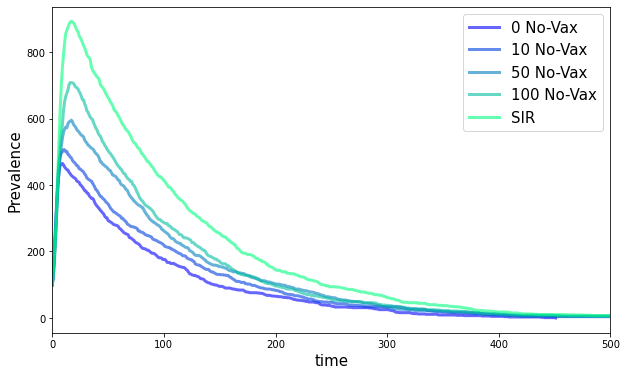

In [146]:
colors = cm.get_cmap('winter', 5)
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))
ax.plot(sim2[0], sim2[2], lw=3, c=colors(0), label= "0 No-Vax", alpha=0.6)
ax.plot(sim3[0], sim3[2], lw=3, c=colors(1), label= "10 No-Vax", alpha=0.6)
ax.plot(sim4[0], sim4[2], lw=3, c=colors(2), label= "50 No-Vax", alpha=0.6)
ax.plot(sim5[0], sim5[2], lw=3, c=colors(3), label= "100 No-Vax", alpha=0.6)
ax.plot(sim1[0], sim1[2], lw=3, c=colors(4), label= "SIR", alpha=0.6)
ax.legend(fontsize=15)
ax.set_ylabel("Prevalence", size=15)
ax.set_xlabel("time", size=15)
ax.set_xlim(0,500)

In [139]:
#nx.draw(BAG3)
n_novax = 0
n_provax = 0
n_neutral = 0
for i, data in BAG3.nodes(data=True):
    if data['aware_status'] == 1:
        n_novax += 1
    elif data['aware_status'] == 2:
        n_provax += 1
    else:
        n_neutral += 1

print('no-vax number:', n_novax)
print('pro-vax number:', n_provax)
print('neutral:', n_neutral)


no-vax number: 25
pro-vax number: 975
neutral: 0


Testing the effect of information polarization

In [11]:
N = 1000 # number of nodes
ave_degree = 15
p = ave_degree / N  # edge probability
initial_infecteds = np.random.choice(np.arange(N), size=100, replace=False)
initial_no_vax50 = np.random.choice(np.arange(N), size=50, replace=False)


mu = 0.01       # recovery rate
beta = 0.015    # infection rate
pro = 0.1       # rate of classical media influence on people
pol = 0.02       # propensity of opinion polarization
p_sym = 0.05    # prob for an infected person to have severe symptoms
r = 0.5         # rate of vaccination for PV

#BAG1 = nx.barabasi_albert_graph(N, ave_degree)
BAG1 = nx.barabasi_albert_graph(N, int(ave_degree/2))
BAG2 = BAG1.copy()
BAG3 = BAG2.copy()

sim_static = SIR_net_adaptive(BAG1, BAG2, beta=beta, mu=mu, r=r, pro=pro, pol=pol, p_sym=p_sym, initial_infecteds=initial_infecteds, initial_no_vax=initial_no_vax50, rewiring=False)
sim_dynamic = SIR_net_adaptive(BAG1, BAG3, beta=beta, mu=mu, r=r, pro=pro, pol=pol, p_sym=p_sym, initial_infecteds=initial_infecteds, initial_no_vax=initial_no_vax50)

TypeError: SIR_net_adaptive() got an unexpected keyword argument 'rewiring'